# **1. Perkenalan Dataset**

## **Tujuan Proyek**
Proyek ini bertujuan untuk mengelompokkan data tanpa label menggunakan teknik clustering. Hasil clustering diharapkan dapat memberikan wawasan tentang pola tersembunyi dalam data, seperti **deteksi penipuan (fraud detection)**, **segmentasi pelanggan**, atau **analisis perilaku transaksi**.

## **Kriteria Dataset**
Dataset yang digunakan harus memenuhi kriteria berikut:
- **Tanpa label**: Tidak memiliki kolom target atau kelas.
- **Beragam tipe data**: Mengandung data numerik dan kategorikal.
- **Ukuran dataset**: Minimal 1000 baris untuk analisis yang bermakna.

## **Langkah-Langkah Proyek**
1. **Pemilihan Dataset**: Memilih dataset yang sesuai dengan kriteria.
2. **Eksplorasi Data**: Memahami struktur data dan pola awal.
3. **Preprocessing Data**: Membersihkan dan mempersiapkan data untuk analisis.
4. **Implementasi Clustering**: Menggunakan algoritma clustering seperti K-Means.
5. **Evaluasi dan Visualisasi**: Mengevaluasi hasil clustering dan memvisualisasikan pola yang ditemukan.

## **Hasil yang Diharapkan**
- Mengidentifikasi pola atau struktur tersembunyi dalam data.
- Menghasilkan kelompok data yang dapat digunakan untuk analisis lebih lanjut, seperti deteksi penipuan atau segmentasi pelanggan.

# **2. Import Library**

## **Tahap 1: Mengimpor Pustaka yang Dibutuhkan**

Pada tahap ini, kita akan mengimpor pustaka (library) Python yang diperlukan untuk analisis data dan pembangunan model machine learning. Pustaka-pustaka ini akan membantu dalam proses seperti manipulasi data, visualisasi, preprocessing, dan implementasi algoritma clustering.

### **Pustaka yang Digunakan**
1. **Pandas**: Untuk manipulasi dan analisis data dalam bentuk tabel.
2. **NumPy**: Untuk operasi numerik dan array multidimensi.
3. **Matplotlib** dan **Seaborn**: Untuk visualisasi data.
4. **Scikit-learn**: Untuk preprocessing data dan implementasi algoritma clustering.

In [42]:
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for graph visualization
from yellowbrick.cluster import KElbowVisualizer  # Import KElbowVisualizer for Elbow method visualization
import seaborn as sns # Import seaborn for create more complex plot statistic
import numpy as np # Import numpy for complex numerical computing
from sklearn.preprocessing import StandardScaler  # For Standardization
from sklearn.preprocessing import LabelEncoder # For convert Categorical data
from sklearn.cluster import KMeans, DBSCAN  # Import KMeans and DBSCAN algorithms for clustering
from sklearn.metrics import silhouette_score  # Import silhouette_score to evaluate clustering results
from sklearn.feature_selection import RFE # Import Recursive Feature Elimination for feature selection
from sklearn.linear_model import LogisticRegression # Import Logistic Regression for feature selection
from sklearn.decomposition import PCA # Import PCA for visualization clustering result   

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam notebook untuk dianalisis lebih lanjut. Jika dataset dalam format CSV, kita dapat menggunakan pustaka **pandas** untuk membacanya. Langkah ini penting untuk memastikan data telah dimuat dengan benar dan memahami struktur dataset.

### **Langkah-Langkah Memuat Dataset**
1. **Dataset dalam Format CSV**:
   - Gunakan fungsi `pd.read_csv()` dari pustaka pandas untuk membaca file CSV.
   - Pastikan file dataset berada di direktori yang benar atau tambahkan path lengkap ke file.

2. **Dataset di Google Drive**:
   - Jika Anda menggunakan Google Colab dan dataset berada di Google Drive, hubungkan Google Drive ke Colab terlebih dahulu dengan kode berikut:
     ```python
     from google.colab import drive
     drive.mount('/content/drive')
     ```
   - Setelah itu, gunakan path file yang sesuai untuk membaca dataset.

3. **Memeriksa Dataset**:
   - Gunakan fungsi seperti `head()` untuk melihat beberapa baris awal dataset.
   - Periksa informasi dataset menggunakan `info()` untuk memastikan data telah dimuat dengan benar.

In [44]:
# Read dataset from initial data and show 5 first rows data.
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## **Tahap 4: Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

### **1. Memahami Struktur Data**
- Tinjau jumlah baris dan kolom dalam dataset menggunakan fungsi seperti `shape`.
- Tinjau jenis data di setiap kolom (numerikal atau kategorikal) menggunakan `info()` atau `dtypes`.

### **2. Menangani Data yang Hilang**
- Identifikasi data yang hilang (*missing values*) menggunakan fungsi seperti `isnull().sum()`.
- Tentukan langkah-langkah untuk menangani data yang hilang, seperti:
  - Mengisi nilai yang hilang dengan rata-rata, median, atau modus.
  - Menghapus baris atau kolom dengan data yang hilang jika proporsinya signifikan.

### **3. Analisis Distribusi dan Korelasi**
- Analisis distribusi variabel numerik:
  - Gunakan statistik deskriptif seperti `describe()`.
  - Visualisasikan distribusi dengan histogram atau boxplot.
- Periksa hubungan antar variabel:
  - Gunakan matriks korelasi dengan `corr()` dan visualisasikan dengan heatmap.
  - Gunakan scatter plot untuk menganalisis hubungan antar variabel numerik.

### **4. Visualisasi Data**
- Buat visualisasi dasar untuk memahami data:
  - Gunakan diagram batang untuk variabel kategorikal.
  - Gunakan histogram atau boxplot untuk variabel numerik.
- Gunakan visualisasi lanjutan:
  - Heatmap untuk menganalisis korelasi antar variabel.
  - Pairplot untuk melihat hubungan antar variabel numerik.

### **Tujuan EDA**
Tujuan dari EDA adalah untuk:
- Memperoleh wawasan awal yang mendalam mengenai data.
- Mengidentifikasi pola, anomali, atau masalah dalam data.
- Menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah total entri, kolom, tipe data, dan total nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam dataset
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00460,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000663,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


## **Mengelompokkan Usia Pelanggan dan Visualisasi Distribusi**

Pada tahap ini, kita mengelompokkan usia pelanggan ke dalam beberapa rentang menggunakan teknik **binning**. Setelah itu, kita membuat grafik batang untuk memvisualisasikan distribusi jumlah pelanggan berdasarkan kelompok usia.

### **Langkah-Langkah**
1. **Mengelompokkan Usia**:
   - Usia pelanggan dikelompokkan ke dalam beberapa rentang:
     - 18-25 tahun
     - 26-35 tahun
     - 36-45 tahun
     - 46-55 tahun
     - 55+ tahun
   - Pengelompokan dilakukan dengan memfilter data berdasarkan kondisi tertentu.

2. **Menyiapkan Data untuk Plotting**:
   - Nama kelompok usia disimpan dalam variabel `x`.
   - Jumlah pelanggan di setiap kelompok dihitung dan disimpan dalam variabel `y`.

3. **Membuat Grafik Batang**:
   - Grafik batang dibuat menggunakan pustaka **Matplotlib**.
   - Warna batang disesuaikan untuk setiap kelompok usia.
   - Label jumlah pelanggan ditambahkan di atas setiap batang.

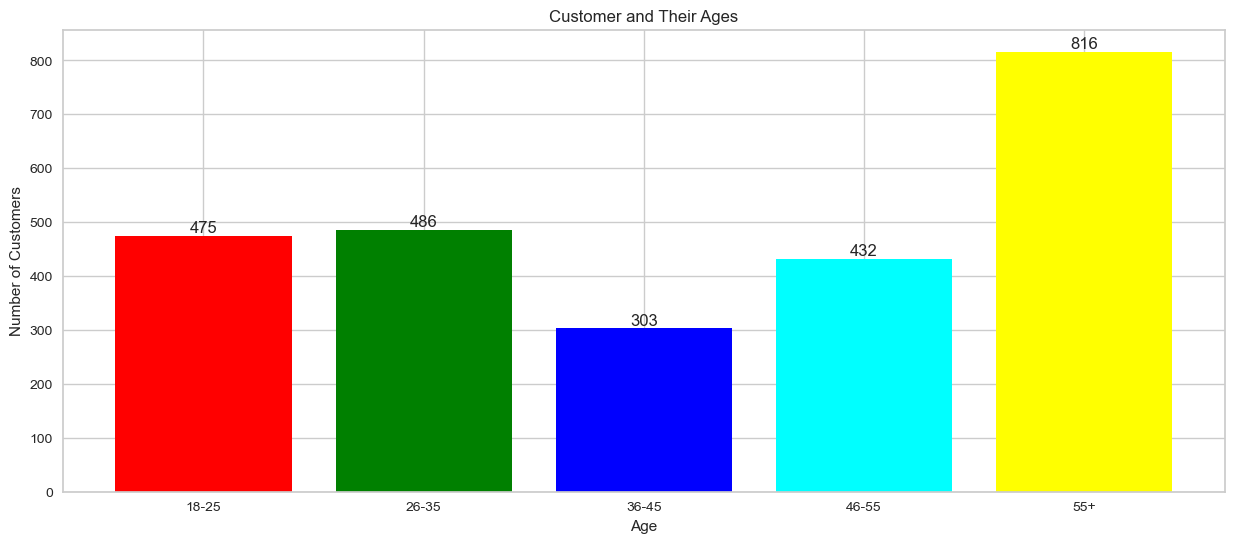

In [ ]:
# Mengelompokkan usia pelanggan menggunakan binning
age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[df.CustomerAge >= 56]

# Set data for plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
 
# Create bar chart for age distribution
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers") 

# Add label
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

## **Mengelompokkan Saldo Akun Pelanggan dan Visualisasi Distribusi**

Pada tahap ini, kita mengelompokkan saldo akun pelanggan ke dalam beberapa rentang menggunakan teknik **binning**. Setelah itu, kita membuat grafik batang untuk memvisualisasikan distribusi jumlah pelanggan berdasarkan kelompok saldo akun.

### **Langkah-Langkah**
1. **Mengelompokkan Saldo Akun**:
   - Saldo akun pelanggan dikelompokkan ke dalam beberapa rentang:
     - $0 - $3,000
     - $3,001 - $6,000
     - $6,001 - $9,000
     - $9,001 - $12,000
     - $12,001 - $15,000
   - Pengelompokan dilakukan dengan memfilter data berdasarkan kondisi tertentu.

2. **Menyiapkan Data untuk Plotting**:
   - Nama kelompok saldo akun disimpan dalam variabel `aix`.
   - Jumlah pelanggan di setiap kelompok dihitung dan disimpan dalam variabel `aiy`.

3. **Membuat Grafik Batang**:
   - Grafik batang dibuat menggunakan pustaka **Matplotlib**.
   - Warna batang disesuaikan untuk setiap kelompok saldo akun.
   - Label jumlah pelanggan ditambahkan di atas setiap batang.

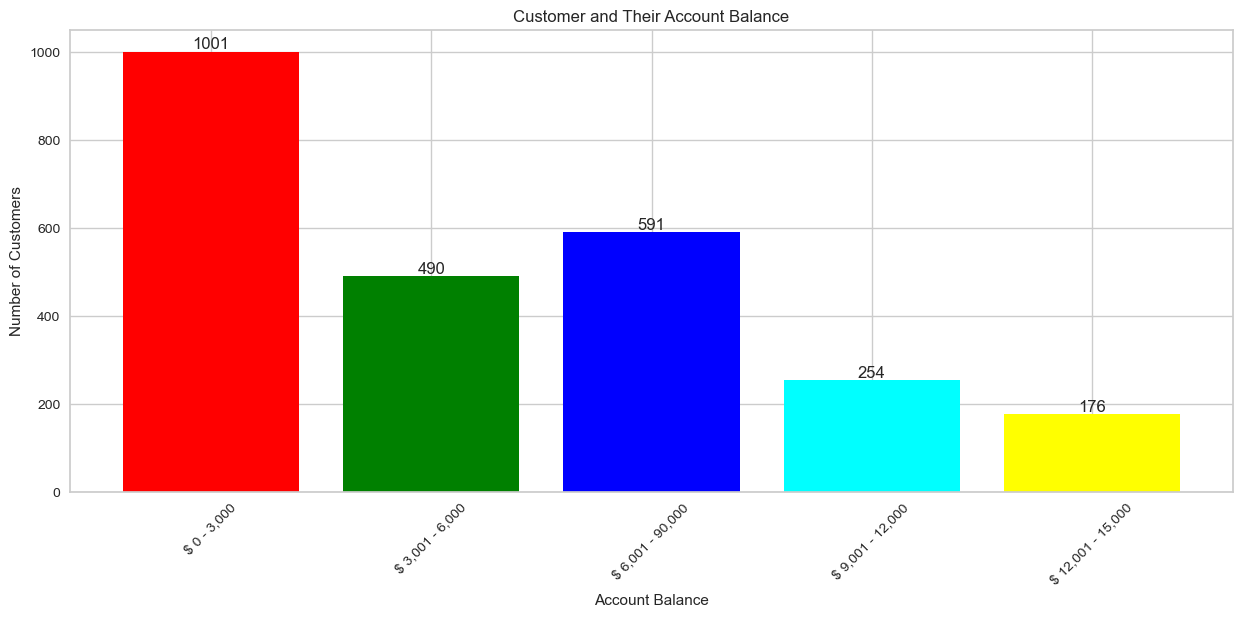

In [ ]:
# Mengelompokkan saldo rekening nasabah
ai0_3000 = df['AccountBalance'][(df["AccountBalance"] >= 0) & (df["AccountBalance"] <= 3000)]
ai3001_6000 = df["AccountBalance"][(df["AccountBalance"] >= 3001) & (df["AccountBalance"] <= 6000)]
ai6001_9000 = df["AccountBalance"][(df["AccountBalance"] >= 6001) & (df["AccountBalance"] <= 9000)]
ai9001_12000 = df["AccountBalance"][(df["AccountBalance"] >= 9001) & (df["AccountBalance"] <= 12000)]
ai12001_15000 = df["AccountBalance"][(df["AccountBalance"] >= 12001) & (df["AccountBalance"] <= 15000)]

# Setting data for plotting
aix = ["$ 0 - 3,000", "$ 3,001 - 6,000", "$ 6,001 - 90,000", "$ 9,001 - 12,000", "$ 12,001 - 15,000"]
aiy = [len(ai0_3000.values), len(ai3001_6000.values), len(ai6001_9000.values), len(ai9001_12000.values), len(ai12001_15000.values)]
 
# Create bar chart for distribution account balance
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Rotate x for easy to read
 
# Add label total customer
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

## **Mengelompokkan Pelanggan Berdasarkan Variabel Kategorikal**

Pada tahap ini, kita mengelompokkan pelanggan berdasarkan variabel kategorikal seperti **TransactionType**, **Channel**, dan **CustomerOccupation**. Setelah itu, kita membuat grafik batang untuk memvisualisasikan distribusi jumlah pelanggan pada setiap kategori.

### **Langkah-Langkah**
1. **Mengelompokkan Data**:
   - Untuk setiap variabel kategorikal, hitung jumlah pelanggan di setiap kategori menggunakan fungsi `value_counts()`.

2. **Menyiapkan Data untuk Plotting**:
   - Nama kategori disimpan dalam variabel `kategori`.
   - Jumlah pelanggan di setiap kategori disimpan dalam variabel `jumlah_pelanggan`.

3. **Membuat Grafik Batang**:
   - Grafik batang dibuat untuk setiap variabel kategorikal menggunakan pustaka **Matplotlib**.
   - Label jumlah pelanggan ditambahkan di atas setiap batang.

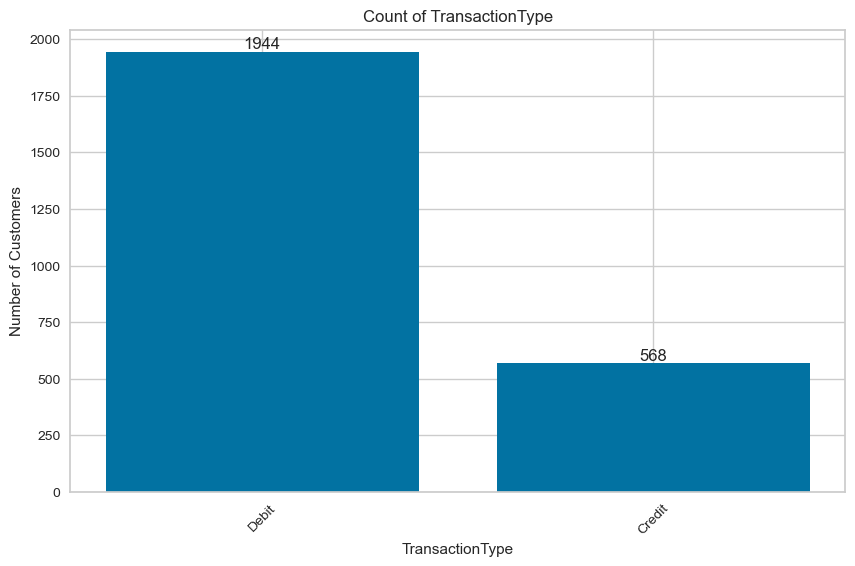

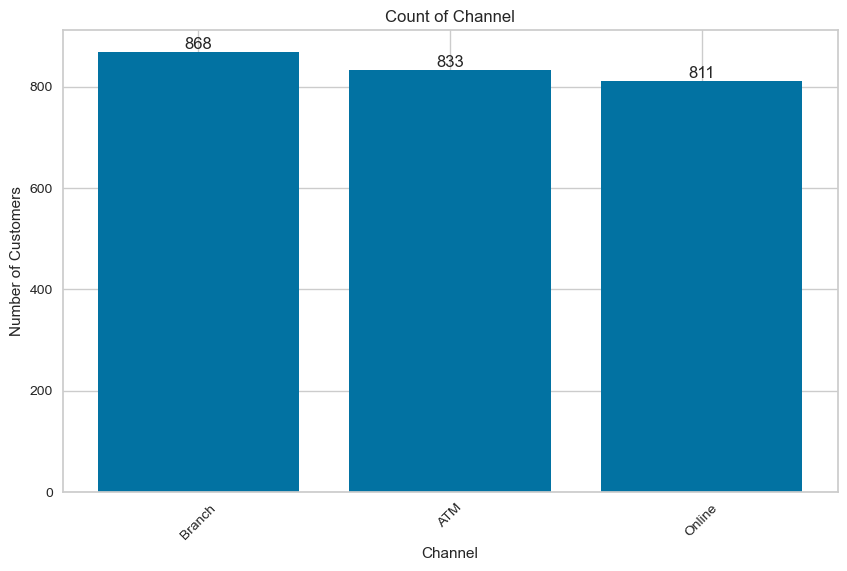

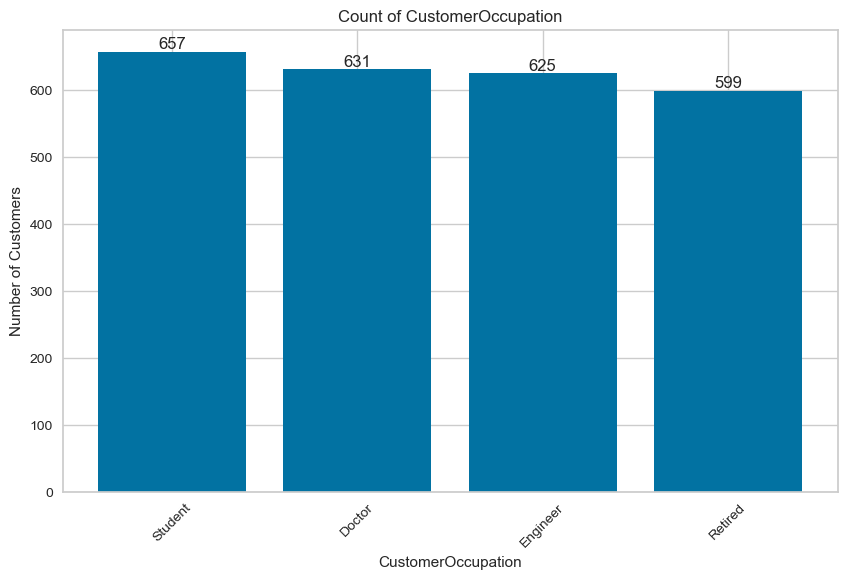

In [ ]:
# Mengelompokkan pelanggan berdasarkan variabel kategorikal
categorical_vars = ['TransactionType', 'Channel', 'CustomerOccupation']

for var in categorical_vars:
    counts = df[var].value_counts()
    categories = counts.index.tolist()
    number_of_customers = counts.values.tolist()
    
    # Create figure for bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot bar chart
    plt.bar(categories, number_of_customers)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    
    # Show value in top of bar chart
    for i, freq in enumerate(number_of_customers):
        plt.text(i, freq, str(freq), ha='center', va='bottom')
    
    plt.show()

## **Visualisasi Distribusi Fitur Numerik**

Pada tahap ini, kita memvisualisasikan distribusi fitur numerik dalam dataset menggunakan histogram. Histogram membantu memahami distribusi data, seperti apakah data berdistribusi normal, miring, atau memiliki outlier.

### **Langkah-Langkah**
1. **Memilih Fitur Numerik**:
   - Gunakan fungsi `select_dtypes(include=[np.number])` untuk memilih kolom dengan tipe data numerik.

2. **Membuat Histogram**:
   - Untuk setiap kolom numerik, buat histogram menggunakan **Seaborn** (`sns.histplot`).
   - Tambahkan garis **Kernel Density Estimate (KDE)** untuk melihat distribusi data secara lebih halus.

3. **Mengatur Layout**:
   - Gunakan `plt.subplot()` untuk menampilkan beberapa histogram dalam satu figure.
   - Gunakan `plt.tight_layout()` untuk memastikan grafik tidak saling tumpang tindih.

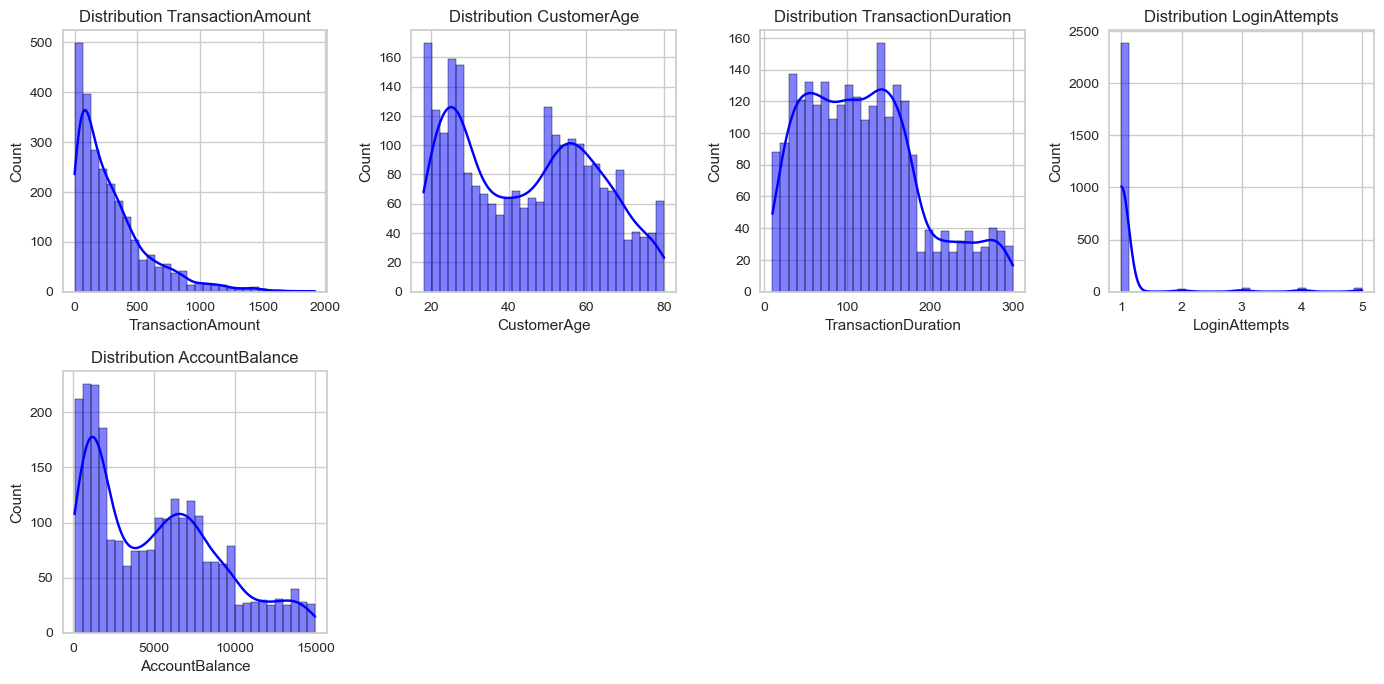

In [50]:
# Distribution for numerical features
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

## **Visualisasi Distribusi Fitur Kategorikal**

Pada tahap ini, kita memvisualisasikan distribusi fitur kategorikal dalam dataset menggunakan grafik batang horizontal. Visualisasi ini membantu memahami jumlah data di setiap kategori untuk fitur kategorikal yang terpilih.

### **Langkah-Langkah**
1. **Memilih Fitur Kategorikal**:
   - Gunakan daftar `variabel_kategorikal` yang berisi nama kolom dengan tipe data kategorikal.

2. **Membuat Grafik Batang Horizontal**:
   - Untuk setiap kolom kategorikal, buat grafik batang horizontal menggunakan **Seaborn** (`sns.countplot`).
   - Warna batang diatur menggunakan palet `viridis`.

3. **Mengatur Layout**:
   - Gunakan `plt.subplot()` untuk menampilkan beberapa grafik dalam satu figure.
   - Gunakan `plt.tight_layout()` untuk memastikan grafik tidak saling tumpang tindih.

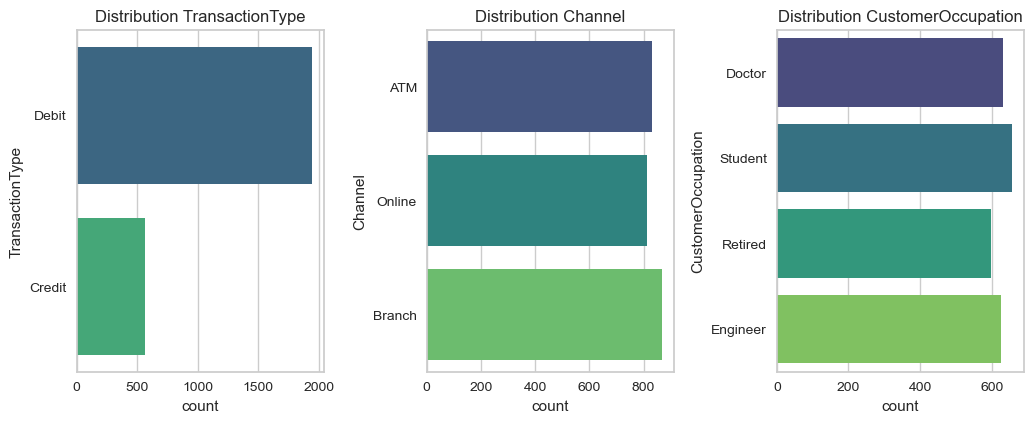

In [51]:
# Selected distribution from categorical features
plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], hue=df[column], palette='viridis', legend=False)
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

## **Visualisasi Hubungan Antar Fitur Numerik dengan Pairplot**

Pada tahap ini, kita menggunakan **pairplot** untuk memvisualisasikan hubungan antar fitur numerik dalam dataset. Pairplot membantu dalam memahami pola hubungan antar fitur, seperti korelasi, distribusi, atau keberadaan outlier.

### **Langkah-Langkah**
1. **Memilih Fitur Numerik**:
   - Gunakan dataset yang hanya berisi kolom dengan tipe data numerik.

2. **Membuat Pairplot**:
   - Gunakan fungsi `sns.pairplot()` dari pustaka **Seaborn** untuk membuat scatter plot dan histogram antar fitur numerik.

3. **Menampilkan Plot**:
   - Gunakan `plt.show()` untuk menampilkan hasil visualisasi.

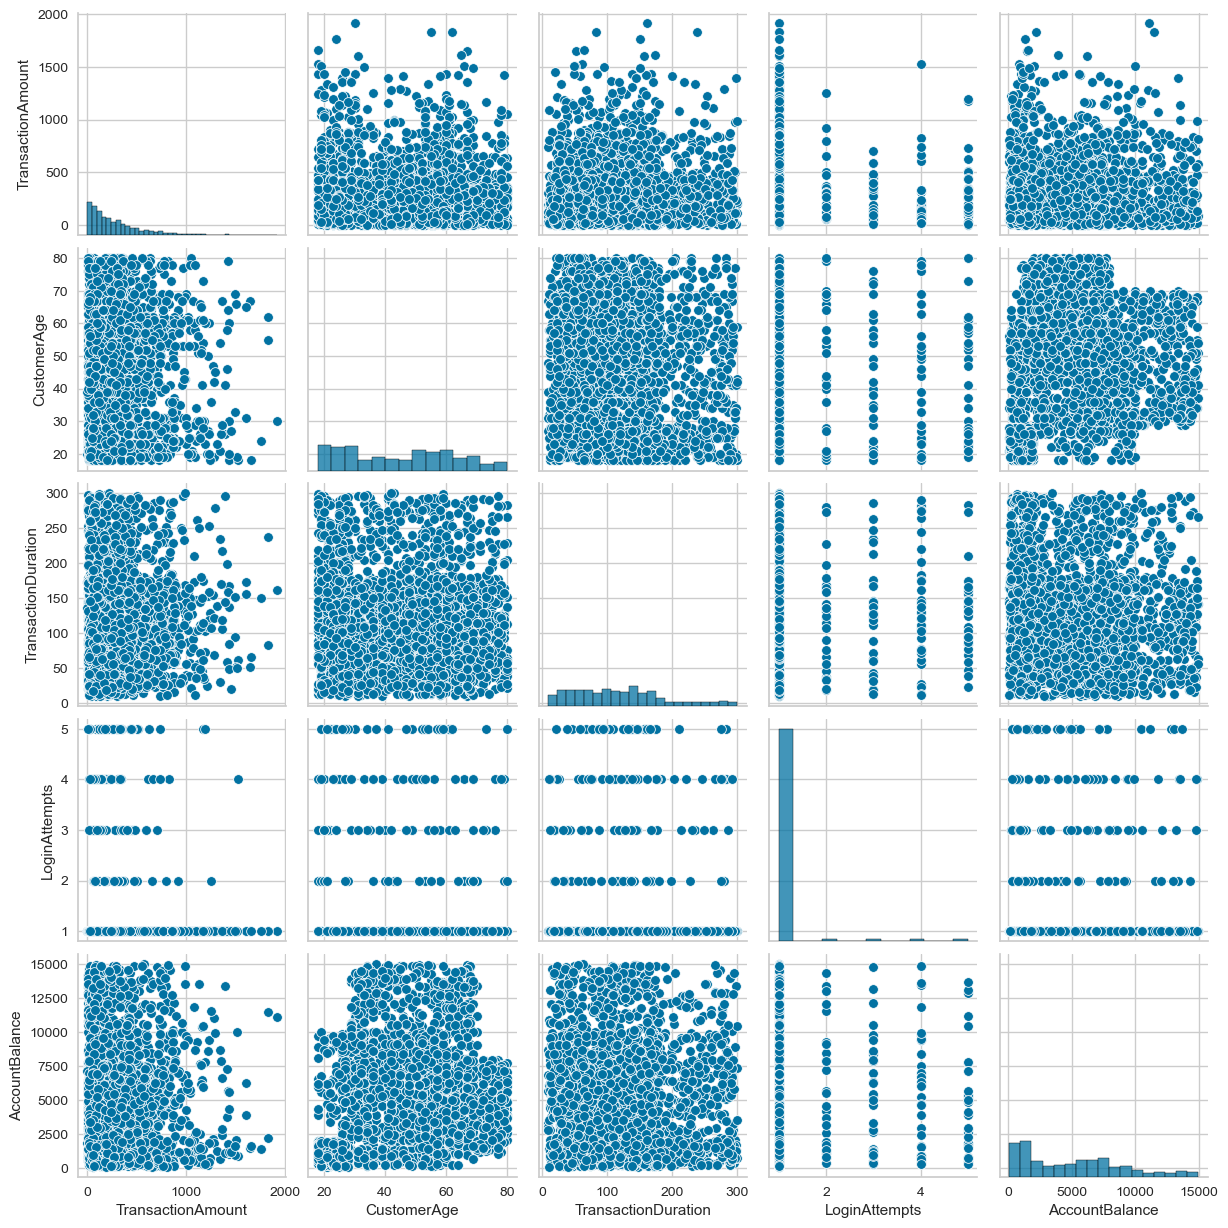

In [52]:
# Pairplot for numerical features
sns.pairplot(num_features)
plt.show()

## **Visualisasi Korelasi Antar Fitur Numerik dengan Heatmap**

Pada tahap ini, kita menggunakan **heatmap** untuk memvisualisasikan matriks korelasi antar fitur numerik. Heatmap membantu dalam memahami hubungan antar fitur, seperti korelasi positif atau negatif, yang dapat digunakan untuk analisis lebih lanjut.

### **Langkah-Langkah**
1. **Menghitung Matriks Korelasi**:
   - Gunakan fungsi `corr()` dari pustaka **pandas** untuk menghitung matriks korelasi antar fitur numerik.

2. **Membuat Heatmap**:
   - Gunakan fungsi `sns.heatmap()` dari pustaka **Seaborn** untuk memvisualisasikan matriks korelasi.
   - Tambahkan anotasi untuk menampilkan nilai korelasi pada setiap sel.

3. **Menambahkan Judul dan Menampilkan Heatmap**:
   - Tambahkan judul pada heatmap untuk memberikan konteks visualisasi.
   - Gunakan `plt.show()` untuk menampilkan hasil visualisasi.


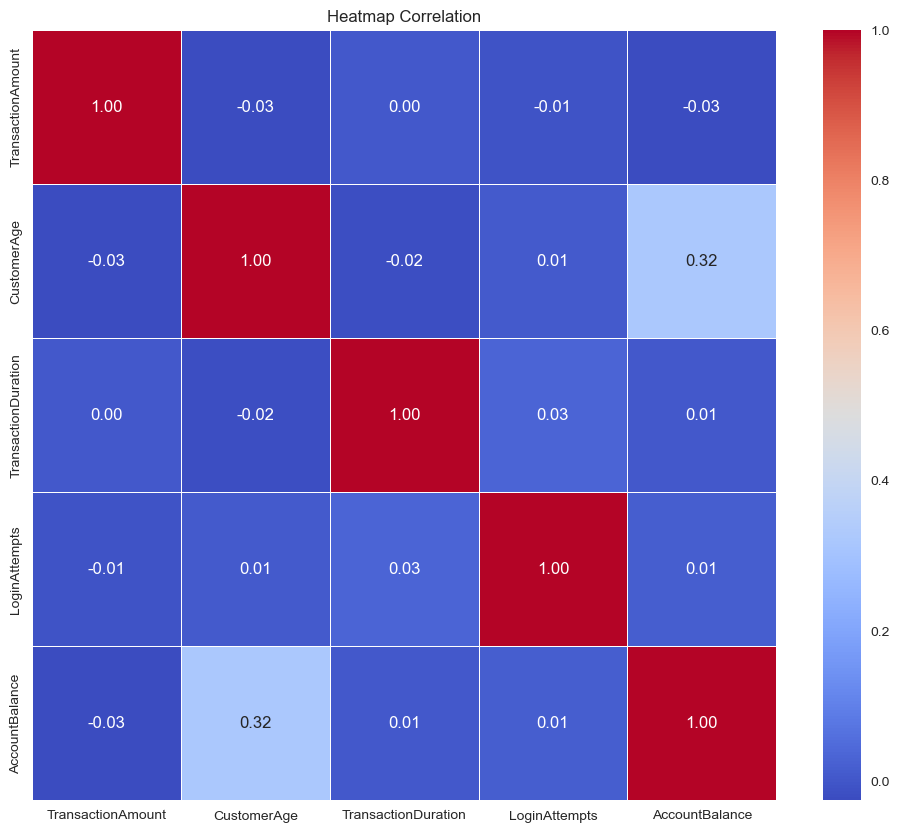

In [53]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

# **5. Data Preprocessing**

Data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

### **Tahapan Data Preprocessing**
Berikut adalah tahapan-tahapan yang dapat dilakukan, tetapi **tidak terbatas** pada:

1. **Menghapus atau Menangani Data Kosong (Missing Values)**:
   - Identifikasi nilai kosong menggunakan fungsi seperti `isnull()` atau `isna()`.
   - Tangani nilai kosong dengan:
     - Mengisi nilai kosong menggunakan rata-rata, median, atau modus.
     - Menghapus baris atau kolom dengan nilai kosong jika proporsinya signifikan.

2. **Menghapus Data Duplikat**:
   - Gunakan fungsi `drop_duplicates()` untuk menghapus data yang duplikat.

3. **Normalisasi atau Standarisasi Fitur**:
   - Normalisasi: Mengubah data ke rentang [0, 1] menggunakan `MinMaxScaler`.
   - Standarisasi: Mengubah data agar memiliki rata-rata 0 dan standar deviasi 1 menggunakan `StandardScaler`.

4. **Deteksi dan Penanganan Outlier**:
   - Gunakan metode seperti IQR (Interquartile Range) atau Z-Score untuk mendeteksi outlier.
   - Tangani outlier dengan:
     - Menghapus data outlier.
     - Menggunakan teknik transformasi data.

5. **Encoding Data Kategorikal**:
   - Gunakan teknik encoding seperti:
     - **One-Hot Encoding** untuk data kategorikal nominal.
     - **Label Encoding** untuk data kategorikal ordinal.

6. **Binning (Pengelompokan Data)**:
   - Kelompokkan data numerik ke dalam rentang tertentu untuk analisis yang lebih mudah.

### **Catatan**
- Tahapan preprocessing dapat disesuaikan dengan karakteristik data yang digunakan.
- Pastikan untuk memvalidasi hasil preprocessing sebelum melanjutkan ke tahap analisis atau pemodelan.

### **Tujuan**
- Membersihkan data dari masalah seperti nilai kosong, duplikasi, atau outlier.
- Memastikan data dalam format yang sesuai untuk analisis atau pemodelan machine learning.

In [54]:
# Copy df for preprocessing
df_preprocessed = df.copy()
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [55]:
# Check for duplicates
duplicates = df_preprocessed.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for missing values
missing_values = df_preprocessed.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Number of duplicate rows: 0
Missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## **Mengubah Tipe Data Menjadi Datetime**

Pada tahap ini, kita mengubah tipe data kolom tertentu dari tipe **object** menjadi **datetime**. Langkah ini penting untuk memastikan data tanggal dapat digunakan dengan benar dalam analisis waktu atau perhitungan berbasis tanggal.

### **Langkah-Langkah**
1. **Mengidentifikasi Kolom yang Dibutuhkan**:
   - Pilih kolom yang berisi data tanggal dalam bentuk string atau object.

2. **Mengubah Tipe Data**:
   - Gunakan fungsi `pd.to_datetime()` dari pustaka **pandas** untuk mengonversi tipe data menjadi datetime.

3. **Menampilkan Informasi Dataframe**:
   - Gunakan fungsi `info()` untuk memverifikasi perubahan tipe data dan melihat informasi tentang dataframe yang telah diproses.

In [56]:
# Convert from object to date time
needed_to_convert = ['TransactionDate', 'PreviousTransactionDate']
for col in needed_to_convert: 
    df_preprocessed[col] = pd.to_datetime(df_preprocessed[col])

df_preprocessed.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [57]:
#  Drop unused columns
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'LoginAttempts']
df_preprocessed.drop(columns=columns_to_drop, inplace=True)
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   AccountBalance           2512 non-null   float64       
 9   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 196.4+ KB


In [58]:
# Add column days between last transaction
df_preprocessed["DaysBetweenTransaction"] = (df_preprocessed["PreviousTransactionDate"] - df_preprocessed["TransactionDate"]).dt.days

df_preprocessed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,DaysBetweenTransaction
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,5112.21,2024-11-04 08:08:08,572
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,13758.91,2024-11-04 08:09:35,495
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1122.35,2024-11-04 08:07:04,482
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,8569.06,2024-11-04 08:09:06,548
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,7429.40,2024-11-04 08:06:39,384


In [61]:
# Get all numeric features
numeric_features = df_preprocessed.select_dtypes(include=['number']).columns
print(numeric_features)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'DaysBetweenTransaction'],
      dtype='object')


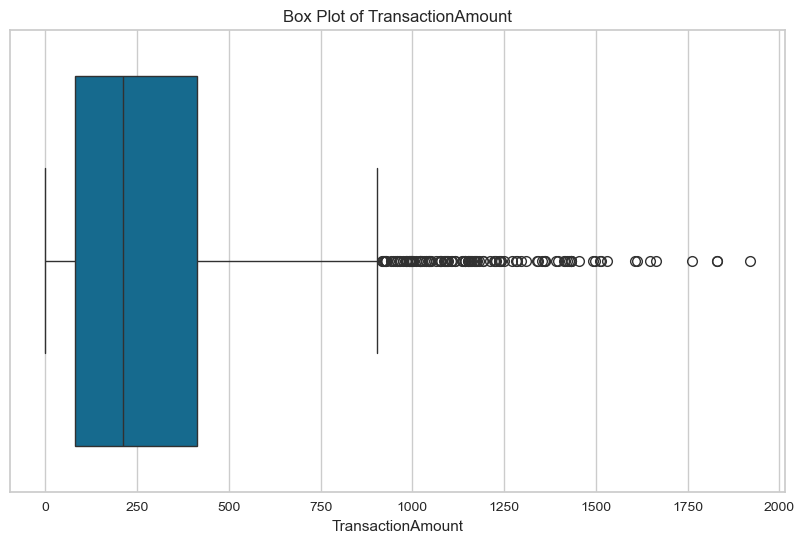

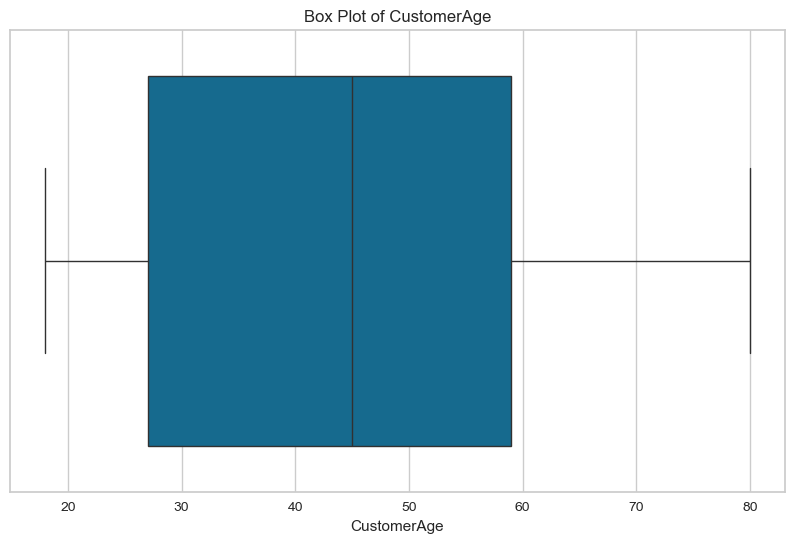

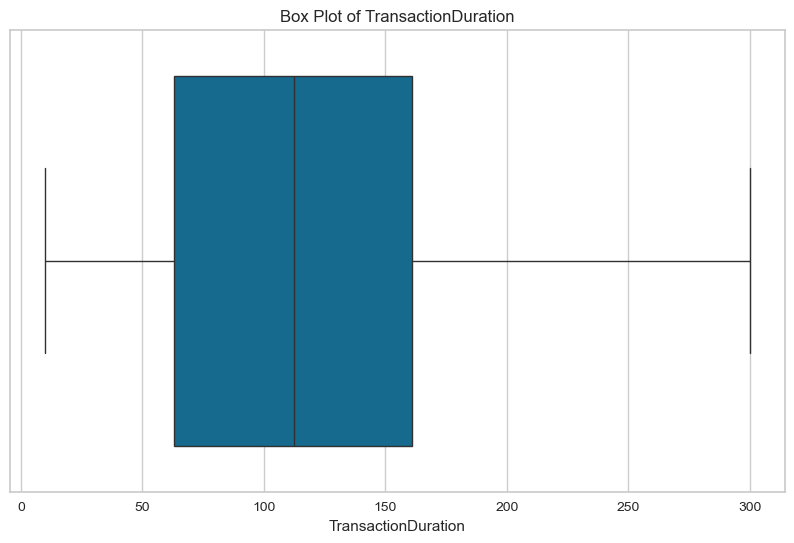

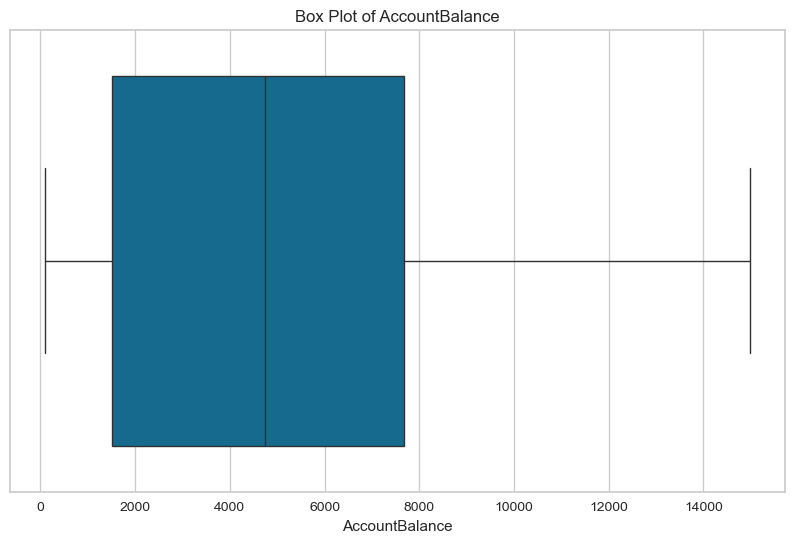

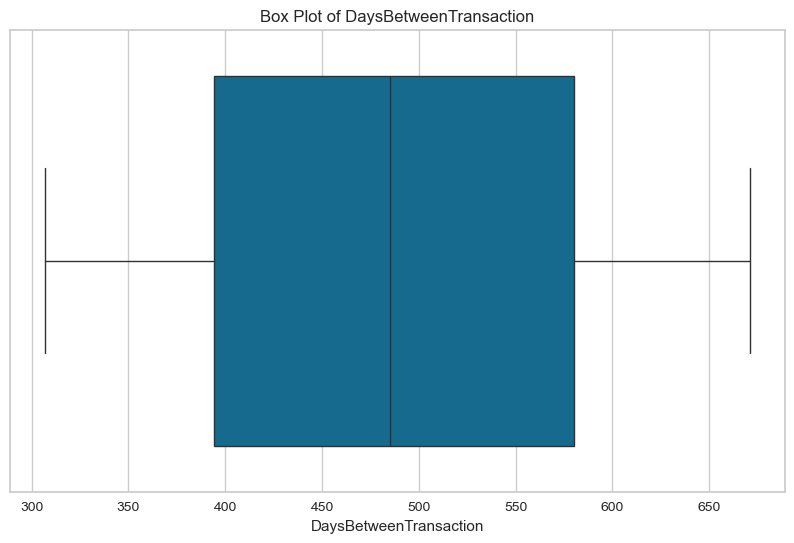

In [62]:
# Make plot for detection outliers
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [63]:
# Handle outliers 
for feature in numeric_features:
    Q1 = df_preprocessed[feature].quantile(0.25)
    Q3 = df_preprocessed[feature].quantile(0.75)
    IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    
    if feature not in ['TransactionAmount', 'AccountBalance']: # Let Outliers in TransactionAmount and AccountBalance
        # Filter dataframe        
        condition = ~((df_preprocessed[numeric_features] < (Q1 - 1.5 * IQR)) | (df_preprocessed[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
        df_preprocessed_filtered_numeric = df_preprocessed.loc[condition, numeric_features]
    # else:
    #     df_preprocessed[feature] = df[feature].apply(lambda x: (Q1 - 1.5 * IQR) if x < lower_bound else (Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

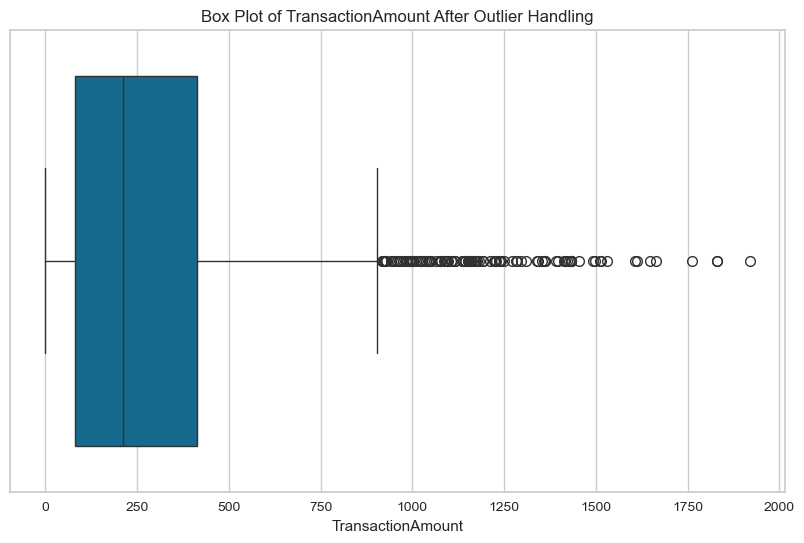

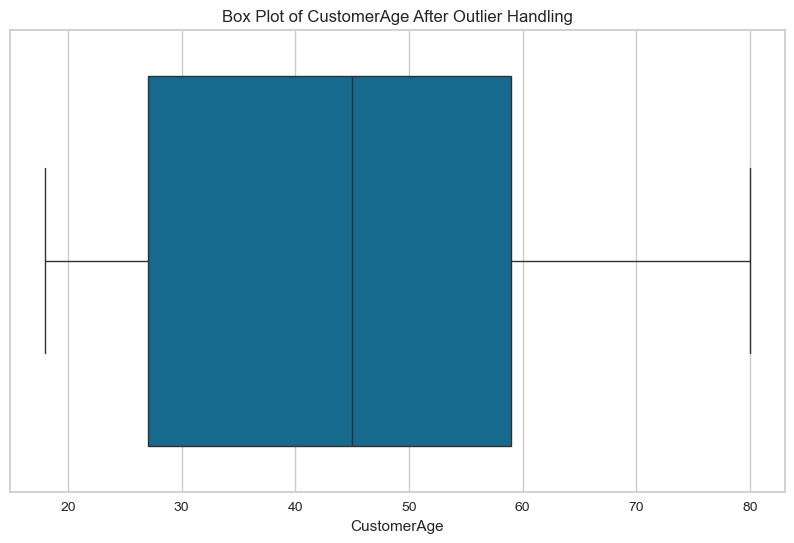

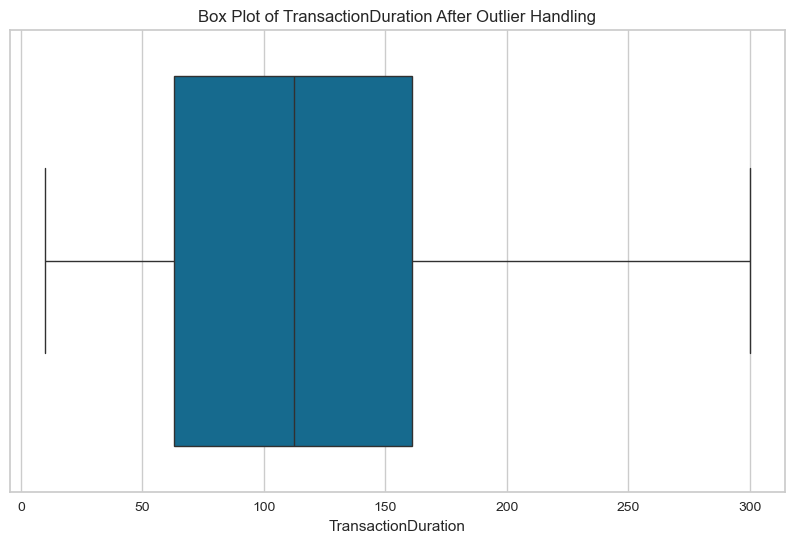

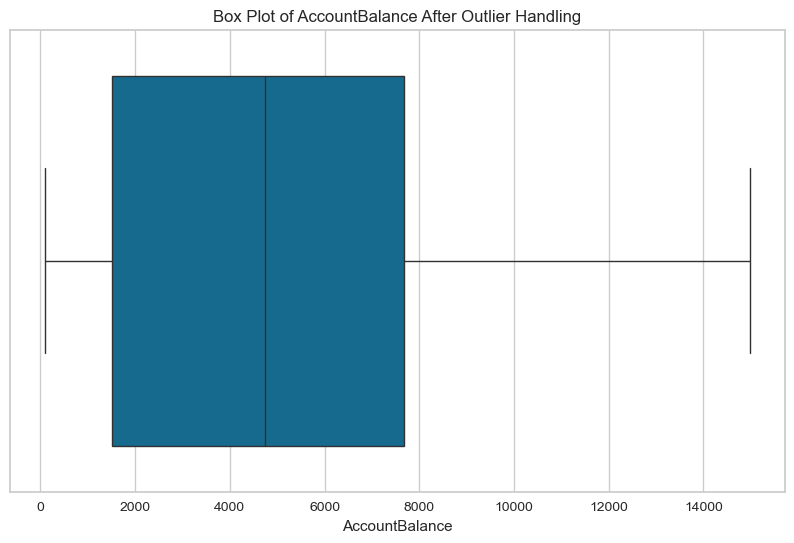

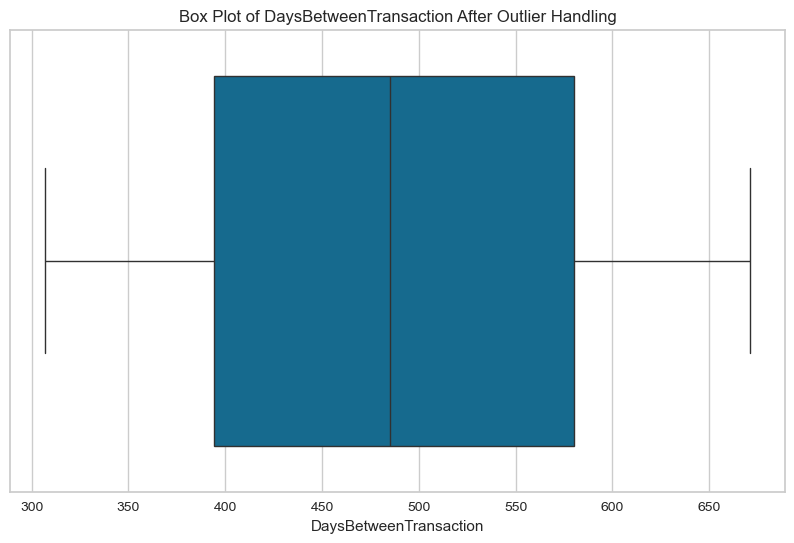

In [64]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[feature])
    plt.title(f'Box Plot of {feature} After Outlier Handling')
    plt.show()

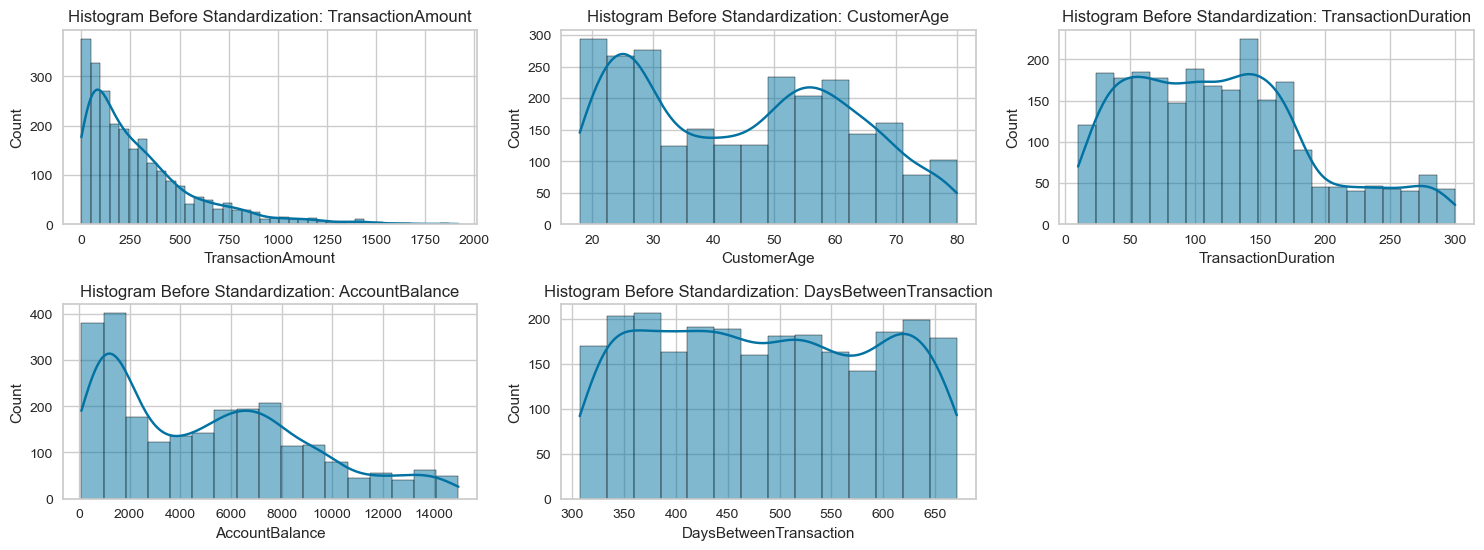

In [65]:
#  Show Histogram before Standardization 
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)  
    sns.histplot(df_preprocessed[feature], kde=True)
    plt.title(f"Histogram Before Standardization: {feature}")
plt.tight_layout()
plt.show()

In [66]:
# Standardization Numerical Data 
scaler = StandardScaler()
df_preprocessed[numeric_features] = scaler.fit_transform(df_preprocessed[numeric_features])

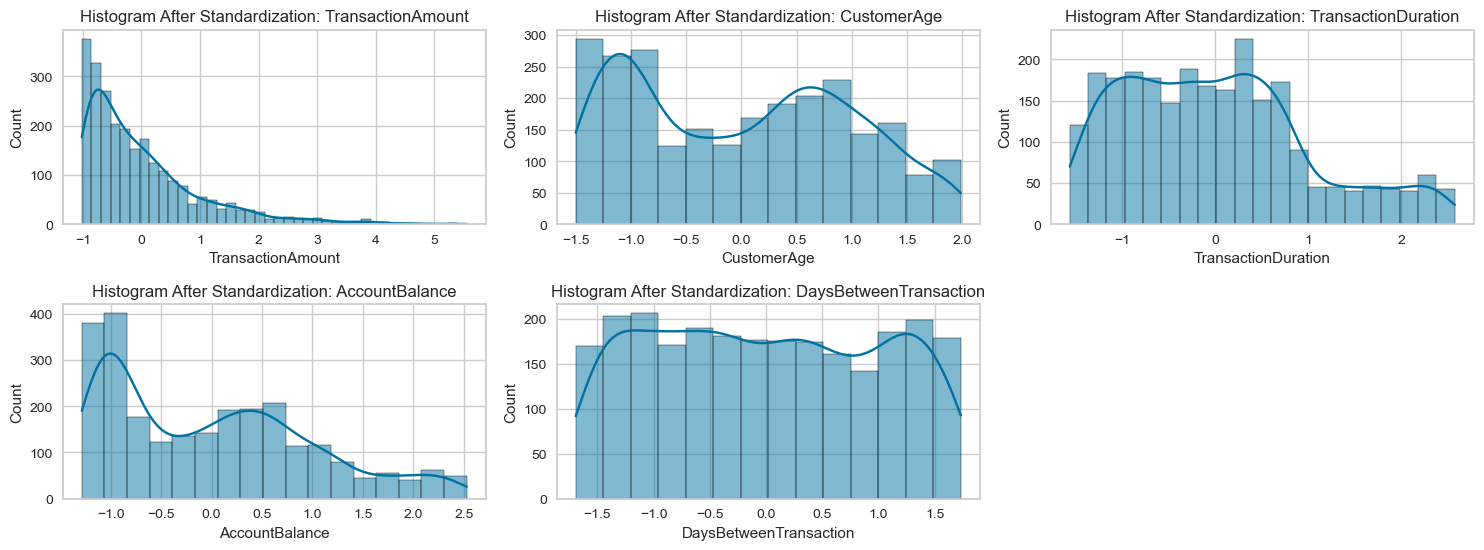

In [67]:
# Show Histogram After Standardization
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_preprocessed[feature], kde=True)
    plt.title(f"Histogram After Standardization: {feature}")
plt.tight_layout()
plt.show()

In [68]:
# Get all categorical features 
categorical_features = df_preprocessed.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')


In [69]:
print("Data Before Label Encoding:")
print(df_preprocessed[categorical_features].head())

Data Before Label Encoding:
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student


In [70]:
# Label Encoding for Categorical Data
label_encoders = {}
df_lencoder = df_preprocessed.copy()

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df_preprocessed[col])


print(df_lencoder.head())

   TransactionAmount     TransactionDate  TransactionType  Location  Channel  \
0          -0.971275 2023-04-11 16:29:14                1        36        0   
1           0.269440 2023-06-27 16:44:19                1        15        0   
2          -0.586882 2023-07-10 18:16:08                1        23        2   
3          -0.387456 2023-05-05 16:32:11                1        33        2   
4          -0.973468 2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  AccountBalance  \
0     1.423718                   0            -0.552443       -0.000537   
1     1.311287                   0             0.305314        2.216472   
2    -1.443277                   3            -0.909842       -1.023534   
3    -1.049768                   3            -1.353017        0.885797   
4    -1.049768                   3             1.120184        0.593589   

  PreviousTransactionDate  DaysBetweenTransaction  
0     2024-11-04

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

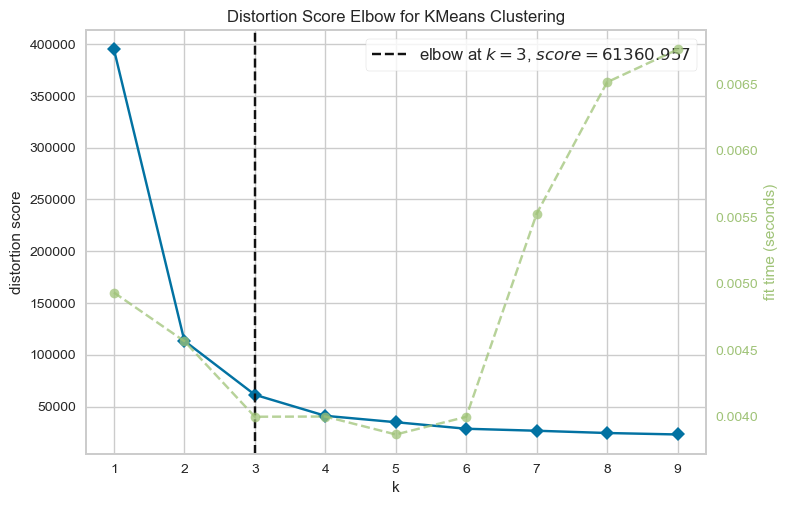

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# Select features for clustering
select_features_k_means = df_lencoder[['TransactionAmount', 'AccountBalance', 'CustomerAge', 'CustomerOccupation', 'DaysBetweenTransaction', 'Channel', 'TransactionType', 'Location', 'TransactionDuration']]

# Initialize KMeans Model without params
kmeans = KMeans()

# Initialize Elbow Method to find optimal K
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer.fit(select_features_k_means)

# Show the result
visualizer.show()

In [74]:
# Initialize KMeans Model with optimal K
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(select_features_k_means)

# Get the cluster labels
cluster_labels = model_kmeans.labels_

# Get n cluster
k = 3

# Function to analyze characteristics of each cluster
def analyze_cluster(X, cluster_labels, k):
    print("Analysis of Cluster Characteristics:")
    for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]
        
        # Calculate the average value of each nominal features in the cluster
        mean_transaction_amount = cluster_data['TransactionAmount'].mean()
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_customer_age = cluster_data['CustomerAge'].mean()
        mean_days_between_transaction = cluster_data['DaysBetweenTransaction'].mean()
        
        # Calculate the mode of each categorical features in the cluster
        mode_channel = cluster_data['Channel'].mode().values[0]
        mode_customer_occupation = cluster_data['CustomerOccupation'].mode().values[0]
        
        
        # Print the average value of each feature in the cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Transaction Amount: {mean_transaction_amount}")
        print(f"Average Account Balance: {mean_account_balance}")
        print(f"Average Customer Age: {mean_customer_age}")
        print(f"Average Days Between Transaction: {mean_days_between_transaction}")
        print(f"Mode Channel: {mode_channel}")
        print(f"Mode Customer Occupation: {mode_customer_occupation}")
        
        
# Analyze the characteristics of each cluster
analyze_cluster(select_features_k_means, cluster_labels, k)

Analysis of Cluster Characteristics:

Cluster 1:
Average Transaction Amount: 0.020872609056587745
Average Account Balance: 0.006464093231016509
Average Customer Age: -0.02859850148684088
Average Days Between Transaction: -0.009700299872505145
Mode Channel: 1
Mode Customer Occupation: 3

Cluster 2:
Average Transaction Amount: -0.001337558076322205
Average Account Balance: 0.010033792511952298
Average Customer Age: 0.02582366845020713
Average Days Between Transaction: -0.01649603417045172
Mode Channel: 1
Mode Customer Occupation: 3

Cluster 3:
Average Transaction Amount: -0.021858185153424046
Average Account Balance: -0.015857245429103193
Average Customer Age: 0.009080955118146123
Average Days Between Transaction: 0.025047650410008584
Mode Channel: 1
Mode Customer Occupation: 1


## **b. Evaluasi Model Clustering**

## **Evaluasi Model Clustering**

Evaluasi model clustering dilakukan menggunakan **Silhouette Score** untuk mengukur kualitas pemisahan antar cluster. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan pemisahan cluster yang lebih baik.

Selain itu, evaluasi dilakukan dengan menganalisis karakteristik setiap cluster berdasarkan fitur numerik dan kategorikal. Hasil evaluasi ini memberikan wawasan tentang pola yang ditemukan dalam data.

In [75]:
# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(select_features_k_means, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4894259923162318


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Selected Features: Index(['AccountBalance', 'CustomerAge', 'Channel', 'TransactionType',
       'Location'],
      dtype='object')


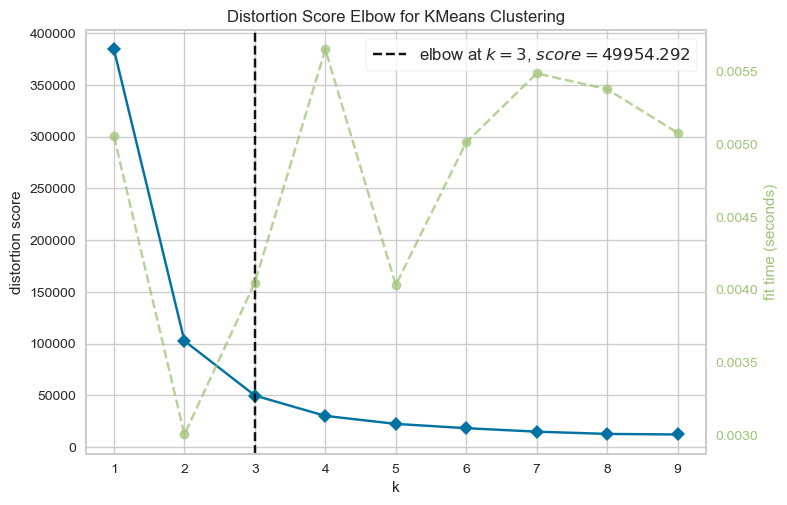

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
# Initialize the model for RFE
model_rfe = LogisticRegression(max_iter=500)
# Initialize RFE with the model and number of features to selec
rfe_selector = RFE(model_rfe, n_features_to_select=5)

# Fit RFE
rfe_selector.fit(select_features_k_means, cluster_labels)

# Get the selected features
selected_features_from_rfe = select_features_k_means.columns[rfe_selector.get_support(indices=True)]
print("Selected Features:", selected_features_from_rfe)

# Elbow Method to find optimal K after Feature Selection
visualizer_rfe = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer_rfe.fit(select_features_k_means[selected_features_from_rfe])

# Show the result
visualizer_rfe.show()

In [77]:
# Copy df based on selected features from rfe 
k_means_rfe = select_features_k_means[selected_features_from_rfe]

# Rebuild the model with selected features
model_kmeans_rfe = KMeans(n_clusters=3, random_state=0)
model_kmeans_rfe.fit(k_means_rfe)

# Get the cluster labels
cluster_labels_rfe = model_kmeans_rfe.labels_

# Evaluate the model using Silhouette Score
silhouette_avg_rfe = silhouette_score(select_features_k_means[selected_features_from_rfe], cluster_labels_rfe)

print(f"Silhouette Score before Feature Selection: {silhouette_avg}")
print(f"Silhouette Score after Feature Selection: {silhouette_avg_rfe}")

Silhouette Score before Feature Selection: 0.4894259923162318
Silhouette Score after Feature Selection: 0.5359736779725359


## **d. Visualisasi Hasil Clustering**

## **Visualisasi Hasil Clustering**

Hasil clustering divisualisasikan menggunakan **PCA** untuk mereduksi dimensi data menjadi dua komponen utama. Scatter plot digunakan untuk menunjukkan distribusi data dalam cluster.

Visualisasi ini membantu memahami distribusi cluster dan pola yang terbentuk dalam data.

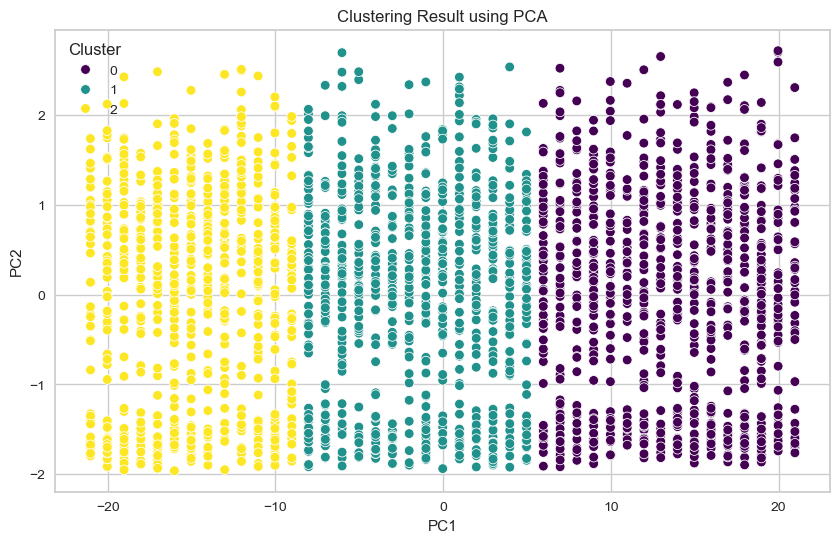

In [78]:
# Visualize the clustering result using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(k_means_rfe)
df_viz = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
df_viz["Cluster"] = cluster_labels_rfe

# Visualize the clustering result using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x="PC1", y="PC2", hue="Cluster", palette="viridis")
plt.title("Clustering Result using PCA")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [79]:
# Add cluster labels to the original dataframe
df_normalized = k_means_rfe.copy()
df_normalized['Cluster'] = cluster_labels_rfe

print("Data Before Inverse Transform:")
print(df_normalized.head())

# Inverse Transform for Categorical Data
df_normalized['Channel'] = label_encoders['Channel'].inverse_transform(df_normalized['Channel'])
df_normalized['TransactionType'] = label_encoders['TransactionType'].inverse_transform(df_normalized['TransactionType'])
df_normalized['Location'] = label_encoders['Location'].inverse_transform(df_normalized['Location'])

print("\nData After Inverse Transform:")
print(df_normalized.head())

Data Before Inverse Transform:
   AccountBalance  CustomerAge  Channel  TransactionType  Location  Cluster
0       -0.000537     1.423718        0                1        36        0
1        2.216472     1.311287        0                1        15        1
2       -1.023534    -1.443277        2                1        23        1
3        0.885797    -1.049768        2                1        33        0
4        0.593589    -1.049768        2                0         1        2

Data After Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0       -0.000537     1.423718     ATM           Debit  San Diego        0
1        2.216472     1.311287     ATM           Debit    Houston        1
2       -1.023534    -1.443277  Online           Debit       Mesa        1
3        0.885797    -1.049768  Online           Debit    Raleigh        0
4        0.593589    -1.049768  Online          Credit    Atlanta        2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:

In [80]:
# Show data before inverse transform
print("Data Before Inverse Transform:")
print(df_normalized.head())


# Inverse Transform for Numerical Data in df_lencoder 
df_lencoder[numeric_features] = scaler.inverse_transform(df_lencoder[numeric_features])

# Change value in df_normalized with inverse transform value from selected features
num_features_selected_rfe = [ 'AccountBalance', 'CustomerAge']
df_normalized[num_features_selected_rfe] = df_lencoder[num_features_selected_rfe]


# Show data after inverse transform
print("\nData After Inverse Transform:")
print(df_normalized.head())

Data Before Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0       -0.000537     1.423718     ATM           Debit  San Diego        0
1        2.216472     1.311287     ATM           Debit    Houston        1
2       -1.023534    -1.443277  Online           Debit       Mesa        1
3        0.885797    -1.049768  Online           Debit    Raleigh        0
4        0.593589    -1.049768  Online          Credit    Atlanta        2

Data After Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0         5112.21         70.0     ATM           Debit  San Diego        0
1        13758.91         68.0     ATM           Debit    Houston        1
2         1122.35         19.0  Online           Debit       Mesa        1
3         8569.06         26.0  Online           Debit    Raleigh        0
4         7429.40         26.0  Online          Credit    Atlanta        2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [81]:
# Function to analyze characteristics of each cluster
def analyze_character_cluster(X, cluster_labels, k):
      print("Analysis of Cluster Characteristics:")
      for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]
        
        # Calculate the average value of each nominal features in the cluster
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_customer_age = cluster_data['CustomerAge'].mean()
        
        # Calculate the mode of each categorical features in the cluster
        mode_channel = cluster_data['Channel'].mode().values[0]
        mode_transaction_type = cluster_data['TransactionType'].mode().values[0]
        mode_location = cluster_data['Location'].mode().values[0]
        
        # Print the average value of each feature in the cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Account Balance: {mean_account_balance}")
        print(f"Average Customer Age: {mean_customer_age}")
        print(f"Mode Channel: {mode_channel}")
        print(f"Mode Transaction Type: {mode_transaction_type}")
        print(f"Mode Location: {mode_location}")
            
analyze_character_cluster(df_normalized, cluster_labels_rfe, k)           

# Calculate statistic description for each cluster
cluster_summary = df_normalized.groupby("Cluster")[num_features_selected_rfe].agg(["mean", "median", "std", "min", "max"])
print("\nStatistic Description for Each Cluster:")
print(cluster_summary)

Analysis of Cluster Characteristics:

Cluster 1:
Average Account Balance: 5139.514002145924
Average Customer Age: 44.16523605150215
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Oklahoma City

Cluster 2:
Average Account Balance: 5052.457076923077
Average Customer Age: 44.83550295857988
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Fort Worth

Cluster 3:
Average Account Balance: 5153.436421768707
Average Customer Age: 45.13333333333333
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Charlotte

Statistic Description for Each Cluster:
        AccountBalance                                          CustomerAge  \
                  mean    median          std     min       max        mean   
Cluster                                                                       
0          5139.514002  4641.615  3948.101975  102.20  14977.99   44.165236   
1          5052.457077  4574.430  3904.394723  101.25  14942.78   44.835503   
2          5

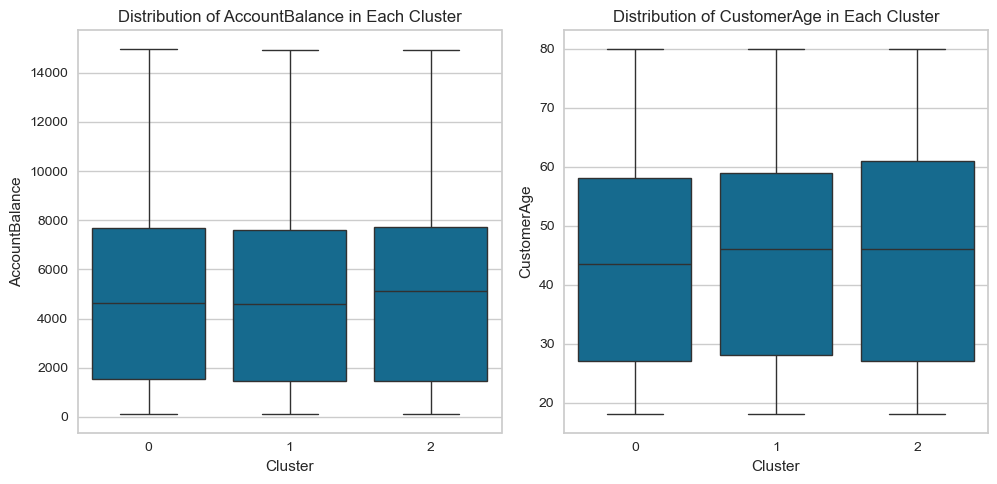

In [82]:
# Visualize numerical features with high correlation in each cluster
selected_numerical_features = ['AccountBalance', 'CustomerAge']

plt.figure(figsize=(15, 5)) 
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_normalized["Cluster"], y=df_normalized[feature])
    plt.title(f'Distribution of {feature} in Each Cluster')
plt.tight_layout()
plt.show()

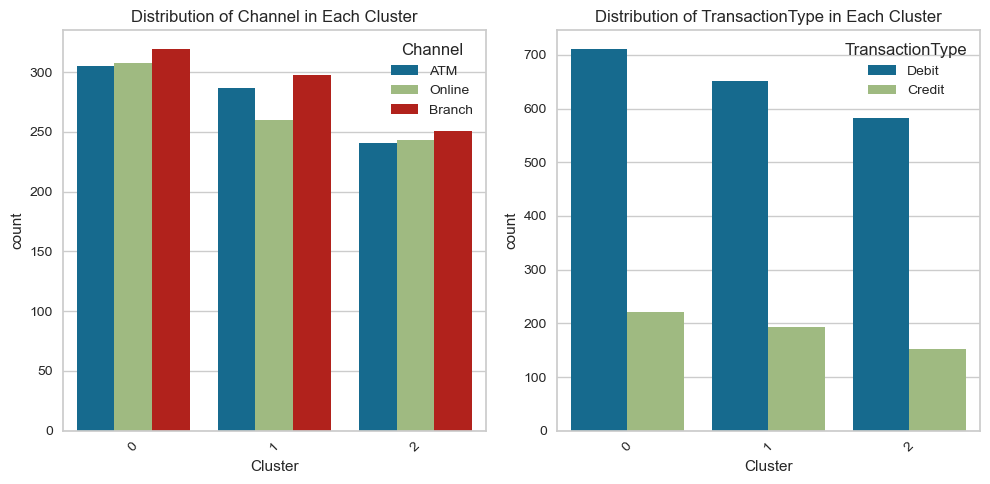

In [83]:
# Visualize categorical features in each cluster
selected_categorical_features = ['Channel', 'TransactionType']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df_normalized["Cluster"], hue=df_normalized[feature])
    plt.title(f'Distribution of {feature} in Each Cluster')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik dari setiap cluster yang diperoleh dari model KMeans.

### **Cluster 1**
- **Rata-rata Saldo Akun**: 5,139.51
- **Rata-rata Usia Pelanggan**: 44.17
- **Channel Terbanyak**: Branch
- **Tipe Transaksi Terbanyak**: Debit
- **Lokasi Terbanyak**: Oklahoma City

**Analisis**:  
Pelanggan pada Cluster 1 memiliki rata-rata saldo akun sebesar 5,139 dengan rata-rata usia 44 tahun. Lokasi transaksi terbanyak adalah di Oklahoma City. Mereka lebih memilih menggunakan channel Branch dan tipe transaksi Debit.

---

### **Cluster 2**
- **Rata-rata Saldo Akun**: 5,052.46
- **Rata-rata Usia Pelanggan**: 44.84
- **Channel Terbanyak**: Branch
- **Tipe Transaksi Terbanyak**: Debit
- **Lokasi Terbanyak**: Fort Worth

**Analisis**:  
Pelanggan pada Cluster 2 mirip dengan Cluster 1, tetapi memiliki rata-rata saldo akun yang lebih rendah, yaitu 5,052. Lokasi transaksi terbanyak adalah di Fort Worth. Untuk channel dan tipe transaksi, mereka sama seperti Cluster 1.

---

### **Cluster 3**
- **Rata-rata Saldo Akun**: 5,153.44
- **Rata-rata Usia Pelanggan**: 45.13
- **Channel Terbanyak**: Branch
- **Tipe Transaksi Terbanyak**: Debit
- **Lokasi Terbanyak**: Charlotte

**Analisis**:  
Cluster 3 memiliki rata-rata saldo akun tertinggi sebesar 5,153. Lokasi transaksi terbanyak adalah di Charlotte. Untuk channel dan tipe transaksi, mereka sama seperti Cluster 1 dan 2. Namun, pelanggan di cluster ini memiliki rata-rata usia tertinggi, yaitu 45 tahun.

---

## **Analisis Berdasarkan Deskripsi Statistik**

### **Saldo Akun**
- Rata-rata saldo akun di semua cluster relatif mirip, berkisar antara 5,052 hingga 5,153.
- Distribusi saldo akun di setiap cluster cukup bervariasi, dengan nilai minimum sekitar 100 dan maksimum sekitar 14,900.
- Standar deviasi saldo akun cukup tinggi (sekitar 3,800 - 3,900), menunjukkan rentang nilai saldo yang luas.

### **Usia Pelanggan**
- Rata-rata usia pelanggan di semua cluster relatif mirip, berkisar antara 44 hingga 45 tahun.
- Distribusi usia pelanggan di setiap cluster cukup bervariasi, dengan nilai minimum 18 tahun dan maksimum 80 tahun. Hal ini menunjukkan pelanggan berasal dari berbagai generasi.

---

## **Kesimpulan dan Rekomendasi**

1. **Kesimpulan**:
    - Semua pelanggan di setiap cluster lebih memilih menggunakan channel Branch dan tipe transaksi Debit.
    - Rata-rata saldo akun dan usia di semua cluster relatif mirip.
    - Fitur yang paling memengaruhi adalah lokasi, di mana setiap cluster memiliki lokasi transaksi terbanyak yang berbeda.

2. **Rekomendasi**:
    - **Tipe Transaksi**: Debit masih menjadi tipe transaksi yang paling banyak digunakan. Disarankan perusahaan memberikan lebih banyak promosi untuk tipe transaksi Kredit, misalnya dengan cashback atau diskon.
    - **Channel Transaksi**: Branch adalah channel yang paling sering digunakan oleh pelanggan. Disarankan perusahaan meningkatkan fungsi channel online atau ATM untuk menarik lebih banyak pelanggan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [84]:
# Export data to CSV
df_normalized.to_csv('bank_transactions_data_clustered.csv', index=False)